# 神经网络学习笔记
## 0_0神经网络的思路及原理
> 2019-29-Mai 佚之狗 https://github.com/HookeLiu QQ: 616471607
---

* 神经网络的基本单元--`神经元`其实和`逻辑回归(Logistic Regression)`模型非常相似, 适合做二分类问题. *"逻辑回归"虽然名称叫"回归", 但实际上是一种分类算法(并且更适合做二分类), 也是一种有监督机器学习算法. 回归问题是指根据输入预测一个数据, 输入和输出都连续; 分类问题是指根据输入预测一个类型, 输出离散. 而逻辑回归是用回归的思路解决分类问题, 模型`p(x;θ,b)`函数实际上就是`Sigmoid函数Y(x)=1/(1+E^-(θx+b))`(Y为决策值/输出值, x为特征值/输入量, θ和b为模型参数). 至于...为什么是用sigmoid函数以及逻辑回归模型为什么是这个样子, 弄清这些对理解神经网络算法的帮助并不大...(大致上来说, sigmoid的鲁棒性也就是抗干扰性很强, 只要类条件服从指数族分布就可以推出后验概率为sigmoid形式, 所以选用它; 逻辑回归也是寻找使得模型正确预测概率最大的参数, 想要所有结果全部正确的概率最大就需要用`最大似然估计`(含义是估计最大可能性), 让P=所有样本正确预测的概率累乘最大, 变换之后就是交叉熵的公式)*
---
### 上面说了这么多, 其实只是想表达三个观点:
> 1. 无论多么复杂的一个神经网络, 它都是个数学模型, 一个模型只能解决某一特定问题, 不可能产生"自己的想法".(至少当前是这样的, 而且可能以后相当久的一段时间都是这样的)
> 2. 数学模型很不友好, 人工提取数据特征(建模)很痛苦, **但神经网络不需要人工数学建模**: 例如, 逻辑回归的推导很麻烦而且不易理解, 但感知机(神经元)却很生动形象, 而且实现起来不需要数学建模, 只需要让它根据数据做优化即可. 这也是神经网络最大的优势 -- "承包了数据建模和特征提取"的工作, 自动"学习"数据的特征.
> 3. 现成好用的第三方框架/计算库已经相当丰富了, 应该灵活运用工具而不应该"重新发明轮子".

In [1]:
import numpy as np              # numpy是一个python上的基础数学运算库, 做数组运算以及数据预处理很方便
import matplotlib.pyplot as plt # matplotlib是一个简单的会图库, 可以方便地函数绘图

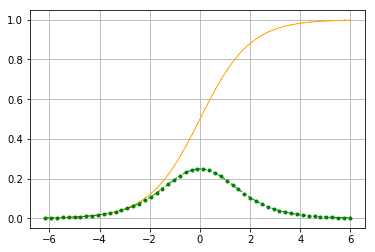

In [2]:
# 绘制Sigmoid函数以便观察
def sigmoid(x):
    # f(x)=1/(1+e^-x), 求导:f'(x) = f(x) * (1 - f(x))
    return 1 / ( 1 + np.exp(-1*x) )
def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

plt.figure()
plt.grid(True)
x_axis  = np.arange(-6.16471607, 6.1647160, 0.233333)
sigPlot = sigmoid(x_axis)
dSigPlt = deriv_sigmoid(x_axis)
plt.plot(x_axis, sigPlot, marker=",", linewidth=1, linestyle="-", color="orange")
plt.plot(x_axis, dSigPlt, marker=".", linewidth=1, linestyle="--", color="green")
plt.show()

* 这个函数的图像就是一个定义域为(-∞,∞), 值域为(0,1), 这就相当于一个从任何实数到概率(0%到100%)的转换(Y(x)就是一个概率分布函数), 从而就可以实现对样本数据的二分类. 并且, 数据离中心点越远, 属于某个类别的可能性也就越大.
* 这个模型和生物神经细胞的**功能**很相似: 信息输入→模式加工→动作输出, 具体来说就是`数据*权重+偏置`作为输→传递函数作为细胞体处理强度→传输函数作为输出传递到轴突. 输入和权重相当于生物神经网相当于生物神经网络树突的连接强度; 对输入的处理(总和以及激活函数)就相当于生物神经细胞对刺激的动作.对于生物神经细胞来说这个输入通常是神经递质的类型和量,这些递质对细胞膜的刺激会使得膜电位变化并且会累加到轴突,当轴突上的膜电位达到某一程度时细胞体就会向后传递.生物细胞受刺激后发出的信号实际上是密度不同的脉冲, 称为发放率,和PDM(脉冲密度调制)很相似. 
* 而人工神经网络也是在**功能上**借鉴了生物神经网络: 深度神经网络分层次提取特征并逐层传递; CNN的卷积和池化也是模仿了生物视觉中的感受野与抑制野, 能更好地提取空间频率特征;
* 但实际上, 就目前来说, 人工神经网络都是在"拟合一个函数", 实际上就是把数学建模或者说特征提取的工作交给神经网络. 比如每两个神经元如果权重互为相反数, 调节权重和偏置就能调节一个“矩形波”, 以“极限”的思想, 无数个“矩形波”可以拟合出任何函数. 

一个人工神经元实质上的功能就是把输入数据×权重再求和之后加上偏置作为传递函数的输入, 即`out = activFuc( ∑(W.T*X+b) )`

In [3]:
def neron(x, w, b):
    inp = w[0]*x[0] + w[1]*x[1] + b
    out = sigmoid(inp)
    return {'out':out, 'inSum':inp}

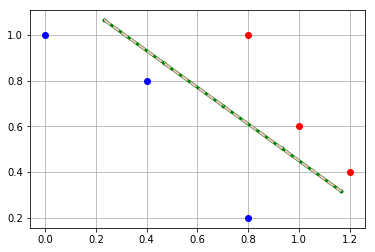

In [4]:
x = np.array([    # 假设在一个平面上有两类点: 第一类([ [1.0,0.6],[0.8,1.0],[1.2,0.4] ]); 第二类([ [0.0,1.0],[0.4,0.8],[0.8,0.2] ])
    [1, 0.6],[0.8, 1.0],[1.2, 0.4],
    [0 ,1],[0.4, 0.8],[0.8, 0.2],
])
l = np.array([    
     1,  1,  1,
     0,  0,  0,
])
# 把数据绘制出来方便观察
plt.figure()
plt.grid(True)
for i in range( len(x) ):
    if l[i] == 1: 
        plt.plot(x[i][0], x[i][1], 'ro')
    else:
        plt.plot(x[i][0], x[i][1], 'bo') 
# 目测这么一条线可以分割
x_axis = np.arange(0.233333, 1.33333, 0.233333)
deline = (0.25-1*0.16*x_axis)/0.2
lineN  = -0.8*x_axis+1.25
plt.plot(x_axis, deline, marker=".", linewidth=3, linestyle="-", color="green")
plt.plot(x_axis, lineN, marker=",", linewidth=2, linestyle="--", color="pink")
plt.show()

对于上面的数据集, 通过观察可以看出两种类型的点是可以通过一条直线划分开的(线性可分), 这条直线(决策边界)目测可能是y=-0.8x+1.25, 相当于w→[0.16, 0.2], b→-0.25 (决策边界可以表示成"y=-(weights[0]x_axis+b)/weights[1]", 其实就是"ax+by+c=0"为了方便绘图变形成了"y=-(ax+c)/b". 感知机的参数x=[x,y],w=[a,b],b=c可能容易造成混淆, 但是它实际上就是一元一次方程). 当然这只是一种可能性, 可能的情况是无数多的.
* 这样的分类问题称为`逻辑回归`, 因为它的原理是拟合一条决策边界来划分散点的类型, 其中拟合决策边界的过程也就是线性回归. 对于线性可分的简单问题, 比如上面这样对二维空间做逻辑回归的情况, 只需要一个"神经元"也就是一个基本感知机就可以实现. 但对于线性不可分的问题以及更高维度空间中的分类就必须使用神经网络了. 必须把感知机连接成网络才能提取足够的特征进行分类.

(需要注意的是, **这里所说的维度和物理空间维度不是一个概念, 这里的维度只是指"数据的量", 只是"数据的空间", 就像用数组嵌套来描述表格一样.** 虽然可以借用物理空间维度(一维线二维面三维体)的概念来帮助可视化观察, 但它们不是一个概念. 这里用平面几何来可视化感知机决策边界的变化, 但不意味着感知机真的是在处理平面几何, **感知机在处理的只是参数.**)

* 神经网络之所以能区分那么多的特征, 是因为网络的每一层都在处理不同层次的特征, 要想实现实现每个层次都能"总结"上一层的信息, 那就需要使用非线性的激活函数. 因为如果使用线性的话, 全连接的权重就没有层次关系了, 就相当于所有的层次都压缩到了一层, 神经网络处理特征的能力就会下降. 使用非线性激活函数就相当于让每个前一层的输出都逐层嵌套到后一层的激活函数中.
* 常用的激活函数有:sigmoid/tanh/relu/elu等, 对于浅层神经网络来说使用什么激活函数的区别都不大.
> * sigmoid是把任意实数压缩到(0,1)范围, 输入为0的时候输出是0.5, 所以通常可以表示"概率", 也就是能把任意实数映射到概率. 但此函数的导数最大值为1/4,这意味着很容易造成梯度消失; sigmoid是个非常经典的非线性激活函数, 历史悠久, 来源于最大熵和拉格朗日数乘法.
> * tanh则是把任意实数压缩至[-1,1],相比sigmoid来说是0均匀分布,可以缓解梯度消失的问题;
> * relu是把负数部分取0,正数部分为线性,所以没有梯度消失的问题,但relu的输出非负所以会出现梯度爆炸(即神经元不会再被激活).

* 神经网络可以看成一个"黑盒", 输入一组数据就会输出一组数据, 为了评价一个模型的"好坏"也就是与预期的偏离程度, 就需要定义一个`损失函数`. 定义损失函数并没有一个确切的要求, 通常是根据实际任务需求选择或制定一个合理的函数, 比如SVM(Support Vector Machine, 支持向量机)的损失函数是HL(Hinge Loss, 合页损失函数)`L[y(w.T*x+b)] = Abs[1-y(w.Txb)]`(常用形式是Li = ∑max(0, sj-syi+∆)); 最典型的CEE(Cross Entropy Error,交叉熵误差)`J(θ)=−1/m ∑(i=1,m)( yi*log⁡( hθ(xi) )+(1−yi)*log⁡( 1−hθ(xi) ) )`; 适用于线性回归的MSE(Mean Squared Error, 均方误差)`loss = 1/m ∑(i=1,m) ( (yi−yHeadi)^2 )`等. 
* 主旨就是定义一个函数用于衡量预测与期望值之间的差异, 并通过训练调整参数使得这个差异最小化(优化). 并且, 通过修正参数使损失函数最小化的常用方法是对各个参数做`梯度下降`. 也就是求出各个参数的梯度(可以简单当成"参数对损失函数的影响程度及方向", 通常做法是求损失函数对参数的偏导数), 然后各个参数沿着梯度相反的方向(也就是乘个-1)增加.
* 所谓的"模型好坏"也可以理解成"模型的熵", 熵本身是表示"不确定程度". 对于机器学习来说, 一切信息都存在概率分布, 信息熵越大则信息量越大, 这个分布也就越难以确定.交叉熵是信息论的一个概念, 从字面意思上来说是指"真实分布与非真实分布的交叉", 描述两个概率分布情况的差异, 可以简单理解成"算法使用非真实分布预测出的结果与真实分布情况的不确定性", 数值越小则模型越接近期望. 一般的表达式为`H(p,q) = -∑(i=1,m) ( p(x)*log( q(x) ) )`(其中p代表期望值,q代表预测值).

概括来说, 神经网络的作用就是找到一组使得输出接近期望, 可以表达成`argmin[ F(D;θ)=L[ ∑(i=1,m){xi,yi};θ ] + Ω(θ)`(argmin表示参数最小化, F是一个关于传递模型与参数的函数, L是损失函数, Ω()是正则项 )

In [5]:
def loss_MSE(pred, lable):
    # 均方误差通常是用于衡量两组数据之间的平均差异情况, 感知机"学习到的"参数越小, 预测值也就越接近标签值.
    return np.mean( (lable - pred) ** 2  )
def deriv_loss_MSE(loss):
    # 相当于幂函数的导数, y=x^n, y'=nx^(n-1)
    return 2 * loss

[1.  0.6] → 0.28247859543315595 0 期望值:  1  loss: 0.5148369660115768
[0.8 1. ] → 0.5827809492410632 1 期望值:  1  loss: 0.1740717363161883
[1.2 0.4] → 0.15033193655972288 0 期望值:  1  loss: 0.7219358180303508
[0. 1.] → 0.8411754332916888 1 期望值:  0  loss: 0.7075761095734603
[0.4 0.8] → 0.630415564271682 1 期望值:  0  loss: 0.3974237836759832
[0.8 0.2] → 0.17767202752922526 0 期望值:  0  loss: 0.031567349366345775


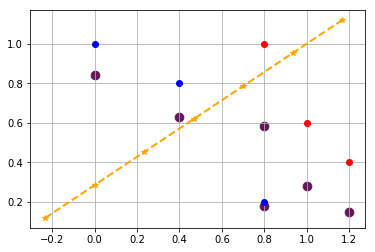

In [6]:
# 随便设定一个初始值(初始化模型)
w = np.array([ -1.666, 2.333 ])
b = -0.666
# 那么这条初始的决策边界可以表示成"y=(-b-w[0]*x_axis)/w[1]"
plt.figure()
plt.grid(True)
# 绘图可视化看看输出的情况
for i in range( len(x) ):
    otpt = neron(x[i], w, b)
    Yout = otpt.get("out")
    pred = 1 if Yout > 0.5 else 0     # 因为sigmoid输入0的时候输出0.5, 所以取0.5作为阈值
    loss = loss_MSE(Yout, l[i])
    plt.scatter(x[i][0], Yout, c="#65165C", s=75 )   # 每个点输入神经元后的总和值, 如果它们分布在y=0的两侧则说明找对了决策边界
    print( x[i], '→', Yout, pred, '期望值: ', l[i] , ' loss:', loss)
    if l[i] == 1: 
        plt.plot(x[i][0], x[i][1], 'ro')
    else:
        plt.plot(x[i][0], x[i][1], 'bo')
x_axis = np.arange(-0.233333, 1.33333, 0.233333)
deline = (-b-1*w[0]*x_axis)/w[1]
plt.plot(x_axis, deline, marker="*", linewidth=2, linestyle="--", color="orange")
plt.show()

观察上面的预测输出情况及决策边界, 可以看出模型把y=(-b-w[0]*x_axis)/w[1]下方的点分类为了"-1"而上方的是"1", 但是实际上决策边界的上方存在2个应该分到1的, 而损失函数给出了它们对应数值与期望值的差距.

* 为了"训练网络", 也就是根据输入和标签调整参数使得网络参数最接近最优解, 就需要通过优化算法对损失函数进行优化. 最常用的优化方法是`梯度下降法(Gradient Descent)`, 它有很多的变体(BGD, SGD, MBGD等). 一些情况下使用`牛顿法`也是不错的.(下面挑取误分点来梯度下降的做法就是SGD简化版本)

* 其实**梯度相当于中学数学里`导数`概念的一个扩展**, 也就是说, 当只有一个参数(一元, 一个维度)的时候梯度的计算和导数的计算一致, 可以把梯度理解为求一个"多维空间"中某个参数在某点变化率最大的向量, 其大小为导数值(其实中学数学里的导数就是省略了方向的一元(一维空间)函数的梯度, 因为一元函数的梯度方向和自变量轴平行, 方向由正负号确定. 高中所学的导数可以近似视为"一元偏导数". 需要区分的是**梯度是矢量而某点的导数是个常量**). 它沿"最陡峭"的方向指向更大值, 而梯度下降就是让这个参数往梯度的反方向更新. 在一维曲线上过一点反应这个曲线变化率的是切线, 在高维空间中这样的直线则有很多条, 所以需要求每一个维度的`偏导数`以选择每一个维度的"切线". 在这里一个权重就是一个维度且一个偏置也是一个维度. 求梯度的操作和求偏导数的操作相同.

* 偏导数, 字面意思上就是"偏向于某个变量的导数", 就是把非这个变量的部分视为常数进行计算.
因为神经网络是逐层的, 所以损失函数总是可以对每个参数连续偏导的, 也就是说损失函数中某一个靠前的运算门可以根据其后一层的梯度来计算自身的梯度, 也叫链式求导, 这个过程叫反向传播. 用`链式求导法, z = f[u(x,y),v(x,y)]在(x,y)处的偏导数: ∂z/∂x = ∂f/∂u * ∂u/∂x + ∂f/∂v * ∂v/∂x ; ∂z/∂y = ∂f/∂u * ∂u/∂y + ∂f/∂v * ∂v/∂y`( 设u=u(x,y),v=v(xy),(x,y)处存在偏导数且z = f(u,v)在(u,v)处具有连续偏导数 )

### 弄不清梯度或者不会算偏导数也不要紧, 反正应用起来也都是用现成的框架和函数库自动计算梯度
> 如果真的需要自己算, 不妨试试mathematica

反向传播的操作可以简单理解成"把正向传播的输出当做反向传播输入, 反向地依次传入每一个门的导函数, 最终求出损失函数对每一个参数的偏导数"

* 梯度下降表示为`θj =θj−α( ∂J(θ)/(∂θj) )`, 含义: 某个权重的更新是自身减去一个损失函数对权重偏导数的常数(`学习率`)倍, 即`某个权重的新值 = 旧值 - 学习速率*(损失函数对旧值的偏导数)`偏导数∂J(θ)/∂θj的定义是`1/m (i=1,m)〖(hθ(xi)−yi) xji 〗` 乘上一个常数项(0到1之间)的意义是在于控制更新的最大步幅, 防止更新参数的时候越过最优解而不能收敛(因为每一步迭代时参数的变化量难以确定, 如果正处于损失函数变化去势很大的点, 参数的变化也会很大, 过大的变化就无法到达最小值点). 

训练一个模型通常的套路是: 
> 1. 初始化权重和偏置(随机或者导入)
> 2. 将数据前向传播
> 3. 根据输出与预期的差异计算误差(损失)
> > * 误差可接受→计算下一组数据
> > * 误差过大→按梯度下降( θ-= LR*(∂J(θ)/(∂θj) )更新参数 (优化器)
> 4. 判断上一次迭代过程中是否更新了参数
> > * 更新了→继续迭代
> > * 没有更新(说明所有预测值和期望值的误差都可接受)→跳出, 结束训练

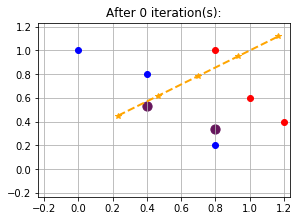

w → [-1.666  2.333]  b → -0.666


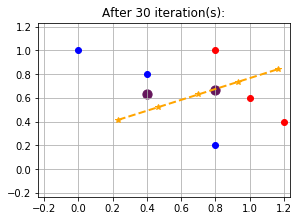

w → [-0.9368579   2.04612709]  b → -0.6322960627536673


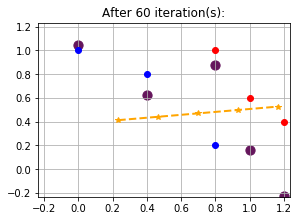

w → [-0.20851595  1.69957674]  b → -0.6531995132674179


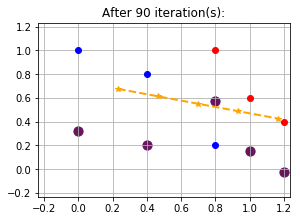

w → [0.32471079 1.21347162]  b → -0.895817338690936


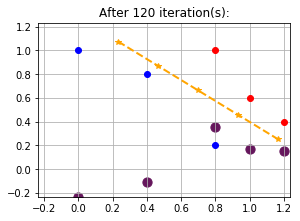

w → [0.74126953 0.84014319]  b → -1.0758823687612389


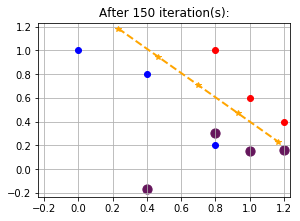

w → [0.79834448 0.7812666 ]  b → -1.1119897090613475


In [7]:
def train(w, b, data, lable, epochs = 100, LR = 0.0616471607, inDebugMode = False):
    # LR, Learn Rate, 超参数_学习率, 选值通常很小, 根据程序员的经验和模型表现进行调试. 也常用随着LR随着epoch增加而减小的方法来改善收敛.
    predcs = np.zeros(np.shape(data)[0])                      # 记录模型对整个数据集的输出, 以便求总体平均误差
    select = -1                                               # 记录被错误分类数据的索引, 只针对分错的数据更新参数
    count  = 0
    for epoch in range(epochs):
        for idx in range( len(data) ):                        # 依次对数据集中的每一个数据迭代一次, 总共迭代len(data)*epoch次
            # 按照上述常规套路的4步中的后3步训练感知机
            otpt = neron(data[idx], w, b)                     # 输入数据预测结果
            Yout = otpt.get("out")
            pred = 1 if Yout > 0.5 else 0   
            loss = loss_MSE(Yout, lable[idx])                         
            if loss > 0.2139223150:                           # 根据误差判断是否需要训练
                select = idx
                # 误差过大: 尝试优化损失函数, 调整参数使其输出最小化
                    # 求梯度(因为损失函数的输入值是神经元的输出值, 所以连续可导, 使用链式求导法求神经元的参数): 
                    # ∂Loss/∂w = ∂loss/∂Yout * ∂Yout/∂inSum * ∂inSum/∂w = (0-2lable+2Yout) * deriv_sigmoid(inSum) * (x+0)
                            #  ≈ (-lable+Yout) * deriv_sigmoid(inSum) * x (因为系数2只影响每次更新的步长, 所以认为成1方便计算)
                    # ∂Loss/∂b = ∂Loss/∂Yout * ∂Yout/∂inSum  * ∂Yout/∂w = 2(-lable+Yout)*deriv_sigmoid(inSum)*1 
                            #  ≈ (-lable+Yout)*deriv_sigmoid(inSum) (为了方便计算)
                inSum = otpt.get("inSum")
                dLoss_dW = (-lable[select]+Yout) * deriv_sigmoid(inSum) * data[select]
                dLoss_dB = (-lable[select]+Yout) * deriv_sigmoid(inSum) 
                #print("*----*debug:idx,data,Yout,pred,dLoss_dW,dLoss_dB",idx,data[select],Yout,pred,dLoss_dW,dLoss_dB)
                    # 梯度下降(更新参数)
                w -= LR * dLoss_dW
                b -= LR * dLoss_dB
                count += 1
        if select == -1:
            break                                            # 不存在误分点就不需要训练
        if (not inDebugMode):
            if epoch % 10 == 0:                              # 每迭代10次输出当前状态并减小一点学习率
                for ds in range( len( data ) ) :
                    predcs[ds] = 1 if inSum > 0 else 0
                print( "迭代第%dCycle，Loss%.5f" %( epoch+1, loss_MSE(predcs, lable) ) ) 
                if LR > 0.001:
                    LR -= 0.00002139223150
            print( "对%d个Sample(s)共更新了%d次，共迭代%depochs" %( np.shape(data)[0], count, ( np.shape(data)[0] ) * (epoch+1) ) )
        select = -1
    return [w,b]
                              
# 训练, 并检查一下训练的成效
# 这里为了方便可视化观察效果, 所以每次训练只迭代30次, 每次训练画一个图像
x_axis = np.arange(0.233333, 1.33333, 0.233333)
for ct in range(6):
    plt.figure( figsize=(4.5, 3.2) ) # 比默认尺寸画得小一点(320*450)好观察变化
    plt.xlim([-0.233,1.233])         # 固定坐标轴取消自动缩放, 以便对比
    plt.ylim([-0.233,1.233])
    plt.grid(True)
    for i in range( len(x) ):
        plt.scatter(x[i][0], x[i][0]*w[0]+x[i][1]*w[1]+b, c="#65165C", s=85 )
        if l[i] == 1: 
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    deline = (-1 * b -1 * w[0] * x_axis)/w[1]
    plt.plot(x_axis, deline, marker="*", linewidth=2, linestyle="--", color="orange")
    plt.title("After "+ str(ct*30) +" iteration(s):") 
    plt.show()
    print("w →", w, " b →", b)
    
    parameters = train(w, b, x, l, 30, 0.1, True)
    w, b = parameters[0], parameters[1]

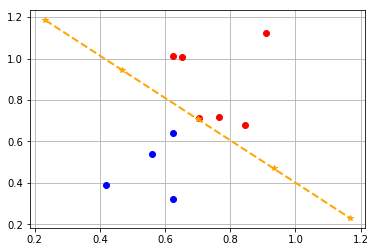

In [8]:
# 随便做一点测试数据大致意思一下
test = np.random.normal(0.7, 0.233333 ,(10,2))

plt.figure()
plt.grid(True)
for i in range( len(test) ):
    if (-1 * b -1 * w[0] * test[i][0])/w[1] < test[i][1] :
        plt.plot(test[i][0], test[i][1], 'ro')
    else :
        plt.plot(test[i][0], test[i][1], 'bo')
x_axis = np.arange(0.233333, 1.33333, 0.233333)
deline = (-1 * b -1 * w[0] * x_axis)/w[1]        
plt.plot(x_axis, deline, marker="*", linewidth=2, linestyle="--", color="orange")
plt.show()

In [9]:
for i in range(test.shape[0]):
    otpt = neron(test[i], w, b)
    Yout = 1 if otpt.get("out") > 0.5 else 0
    print( test[i], '→', Yout)

[0.62343337 1.01150995] → 1
[0.62600104 0.64057421] → 0
[0.65191429 1.00833844] → 1
[0.76534565 0.71571292] → 1
[0.70383482 0.71436137] → 1
[0.9090846  1.12452123] → 1
[0.62351139 0.3232557 ] → 0
[0.84517498 0.67904707] → 1
[0.41860222 0.39208443] → 0
[0.56001775 0.53895947] → 0
